# Imports

In [28]:
import re
import pandas as pd
import numpy as np
import scipy
import requests
from bs4 import BeautifulSoup
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
from scipy.stats import pearsonr, linregress
import statsmodels.api as sm
import pingouin as pg
from statsmodels.stats.multitest import multipletests
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
import warnings
import matplotlib.cbook
import matplotlib.dates as mdates
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import seaborn as sns
sns.set_theme(style="white")
# import calplot
# import july
import time

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import TransformedTargetRegressor, make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, adjusted_rand_score,r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import RepeatedKFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBRFClassifier

In [29]:
# Add project root to sys.path so you can import path_config regardless of notebook location
sys.path.append(str(Path.cwd().parents[2]))  # adjust depth as needed if notebook is deep in folders

from path_config import project_path, project_data_sources_path, project_data_exports_path

print(f'project_path: {project_path}')
print(f'project_data_sources_path: {project_data_sources_path}')
print(f'project_data_exports_path: {project_data_exports_path}')

project_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football
project_data_sources_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/data/sources
project_data_exports_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/data/exports


In [30]:
# project_path = Path.cwd()
# print(f'project_path: {project_path}')
# print('')
# project_data_sources_path = Path.cwd() / 'data' / 'sources'
# print(f'project_data_sources_path: {project_data_sources_path}')
# print('')
# project_data_exports_path = Path.cwd() / 'data' / 'exports'
# print(f'project_data_exports_path: {project_data_exports_path}')

# User Defined Functions

## Dataset Import and Wrangling

In [31]:
def load_game_results_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'game_results_df.csv',
        # sheet_name='Sheet1 (2)',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [32]:
def load_passing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'passing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [33]:
def load_receiving_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'receiving_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [34]:
def load_rushing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'rushing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [35]:
def load_spotrac_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_salary_cap_data_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [36]:
def load_nfl_season_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'nfl_season_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [37]:
def load_spotrac_nfl_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [38]:
def load_team_season_records_stats_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'team_season_records_stats_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [39]:
def load_spotrac_nfl_team_season_roster_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [40]:
def load_spotrac_nfl_team_season_roster_pos_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_pos_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [41]:
def load_spotrac_nfl_team_season_roster_position_level_one_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_one_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [42]:
def load_spotrac_nfl_team_season_roster_position_level_two_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_two_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [43]:
def load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_one_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [44]:
def load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_two_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [45]:
def load_spotrac_nfl_team_pos_level_one_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_one_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [46]:
def load_spotrac_nfl_team_pos_level_two_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_two_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [47]:
def summary_stats_df(df, cols):
    summary_stats_results = {}
    for col in cols:
        stats = df[col].agg(['count', 'mean', 'std', 'min', 'var', 'median'])
        quartiles = df[col].quantile([0.25, 0.75])
        summary_stats_results[col] = [stats['count'], stats['mean'], stats['std'], stats['min'], quartiles[0.25], stats['median'], quartiles[0.75], df[col].max(), stats['var']]

    summary_stats_results_df = pd.DataFrame(
        summary_stats_results,
        index=['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max', 'variance']
    )

    return summary_stats_results_df


## Corr & Pval Analysis

In [48]:
def correlation_matrix(df):
    """create correlation matrix dataframe"""
    df_corr_mat = df.corr()
    return df_corr_mat

In [49]:
def correlation_series(df):
    """create a dataframe which has unique feature pairs and their associated correlation coefficient"""
    upper_corr_mat = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
    unique_corr_pairs = upper_corr_mat.unstack().dropna()
    df_corr_series = unique_corr_pairs.sort_values(ascending=False)
    df_corr_series = df_corr_series.reset_index()
    df_corr_series = df_corr_series.rename(columns={
        'level_0': 'feature_1',
        'level_1': 'feature_2',
        0: 'correlation_coefficient'
    })
    return df_corr_series

In [50]:
def correlation_plot(df, title='Correlation Heatmap'):
    """create a correlation heatmap plot using seaborn"""
    mask = np.triu(np.ones_like(df, dtype=bool))
    f, ax = plt.subplots(1, 1, figsize=(11,9), facecolor='white')
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(df,
                mask=mask,
                cmap=cmap,
                vmax=1,
                vmin=-1,
                center=0,
                annot=False,
                square=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})
    ax.set_title(title)
    ax.set_xlabel('Variables')
    ax.set_ylabel('Variables')

    plt.tight_layout()
    return f

In [51]:
def p_val_matrix(df):
    """create p-value matrix dataframe"""
    df_p_val_mat = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(len(df.columns))
    return df_p_val_mat

In [52]:
def p_val_series(df):
    """create a dataframe which has unique feature pairs and their associated level of statistical significance"""
    upper_corr_mat = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
    unique_p_val_pairs = upper_corr_mat.unstack().dropna()
    df_p_val_series = unique_p_val_pairs.sort_values()
    df_p_val_series = df_p_val_series.reset_index()
    df_p_val_series = df_p_val_series.rename(columns={
        'level_0': 'feature_1',
        'level_1': 'feature_2',
        0: 'p_value'
    })
    return df_p_val_series

In [53]:
def p_val_plot(df, title="P-value Heatmap (Green: Significant, White: Not Significant)"):
    """create a level of statistical significance heatmap plot using seaborn"""
    alpha = 0.05
    mask = np.triu(np.ones_like(df, dtype=bool))
    f, ax = plt.subplots(1, 1, figsize=(11,9))
    green = sns.light_palette('seagreen', reverse=True, as_cmap=True)
    green.set_over('white')
    # cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(df,
                mask=mask,
                cmap=green,
                # cmap=cmap,
                vmax=alpha,
                vmin=0,
                # center=0,
                annot=False,
                square=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})
    ax.set_title(title)
    ax.set_xlabel('Variables')
    ax.set_ylabel('Variables')
    plt.tight_layout()
    return f

In [54]:
game_results_df = load_game_results_dataset()
passing_offense_df = load_passing_offense_dataset()
receiving_offense_df = load_receiving_offense_dataset()
rushing_offense_df = load_rushing_offense_dataset()
spotrac_df = load_spotrac_dataset()
nfl_season_records_df = load_nfl_season_records_dataset()
spotrac_nfl_records_df = load_spotrac_nfl_records_dataset()
team_season_records_stats_df = load_team_season_records_stats_dataset()
pos_lev_one_act_inact_df = load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset()
pos_lev_two_act_inact_df = load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset()
pos_lev_one_df = load_spotrac_nfl_team_pos_level_one_grouped_dataset()
pos_lev_two_df = load_spotrac_nfl_team_pos_level_two_grouped_dataset()

spotrac_nfl_team_season_roster_df = load_spotrac_nfl_team_season_roster_df_dataset()
spotrac_nfl_team_season_roster_pos_df = load_spotrac_nfl_team_season_roster_pos_df_dataset()
spotrac_nfl_team_season_roster_position_level_one_df = load_spotrac_nfl_team_season_roster_position_level_one_df_dataset()
spotrac_nfl_team_season_roster_position_level_two_df = load_spotrac_nfl_team_season_roster_position_level_two_df_dataset()

Shape of dataframe: 26910 rows, 15 columns
Shape of dataframe: 16046 rows, 23 columns
Shape of dataframe: 61793 rows, 24 columns
Shape of dataframe: 50107 rows, 24 columns
Shape of dataframe: 59357 rows, 16 columns
Shape of dataframe: 448 rows, 38 columns
Shape of dataframe: 59357 rows, 54 columns
Shape of dataframe: 4054 rows, 49 columns
Shape of dataframe: 1344 rows, 23 columns
Shape of dataframe: 4032 rows, 23 columns
Shape of dataframe: 1344 rows, 13 columns
Shape of dataframe: 4032 rows, 13 columns
Shape of dataframe: 896 rows, 15 columns
Shape of dataframe: 16458 rows, 16 columns
Shape of dataframe: 2605 rows, 16 columns
Shape of dataframe: 7893 rows, 16 columns


# Team Active - Inactive No Positions

In [55]:
spotrac_nfl_team_season_roster_position_level_one_df

,team,season,position_level_one,roster_status,player_count,cap_hit_sum,position_level_one_count_prop,position_level_one_cap_hit_prop,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct
0,arizona-cardinals,2011,defense,active,26,46212697.0,0.448276,0.416222,8,8,0.500,312,348,-36,0.667,0.583
1,arizona-cardinals,2011,defense,inactive,12,3327689.0,0.521739,0.447180,8,8,0.500,312,348,-36,0.667,0.583
2,arizona-cardinals,2011,offense,active,29,61041169.0,0.500000,0.549777,8,8,0.500,312,348,-36,0.667,0.583
3,arizona-cardinals,2011,offense,inactive,10,3969692.0,0.434783,0.533453,8,8,0.500,312,348,-36,0.667,0.583
4,arizona-cardinals,2011,special_team,active,3,3775000.0,0.051724,0.034000,8,8,0.500,312,348,-36,0.667,0.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,washington-commanders,2024,defense,inactive,39,15942070.0,0.382353,0.293029,12,5,0.706,485,391,94,0.667,0.750
2601,washington-commanders,2024,offense,active,26,87344973.0,0.490566,0.469022,12,5,0.706,485,391,94,0.667,0.750
2602,washington-commanders,2024,offense,inactive,56,35648630.0,0.549020,0.655252,12,5,0.706,485,391,94,0.667,0.750
2603,washington-commanders,2024,special_team,active,3,5441944.0,0.056604,0.029222,12,5,0.706,485,391,94,0.667,0.750


In [58]:
# Define the columns for summary statistics
cols = ['position_level_one_count_prop', 'position_level_one_cap_hit_prop', 'pct']

# Group by roster_status and position_level_one
grouped = spotrac_nfl_team_season_roster_position_level_one_df.groupby(['roster_status', 'position_level_one'])

# Dictionary to store results
results = {}

# Iterate through each group and apply the summary_stats_df function
for (roster_status, position_level_one), group_df in grouped:
    # Apply the summary stats function
    summary_table = summary_stats_df(group_df, cols)
    # Store results with a descriptive key
    key = f"{roster_status}_{position_level_one}"
    results[key] = summary_table
    # Save to CSV
    summary_table.to_csv(f"{project_data_exports_path}/summary_stats_{key}_pt_2.csv")

# Print results for each group
for key, table in results.items():
    print(f"\nSummary Statistics for {key}:\n")
    print(table)


Summary Statistics for active_defense:

          position_level_one_count_prop  position_level_one_cap_hit_prop  \
count                        448.000000                       448.000000   
mean                           0.475581                         0.465244   
std                            0.024820                         0.083628   
min                            0.381818                         0.155984   
25%                            0.461538                         0.405290   
median                         0.471698                         0.464985   
75%                            0.490566                         0.524504   
max                            0.566038                         0.718152   
variance                       0.000616                         0.006994   

                 pct  
count     448.000000  
mean        0.500237  
std         0.191329  
min         0.000000  
25%         0.375000  
median      0.500000  
75%         0.647000  
max         0.

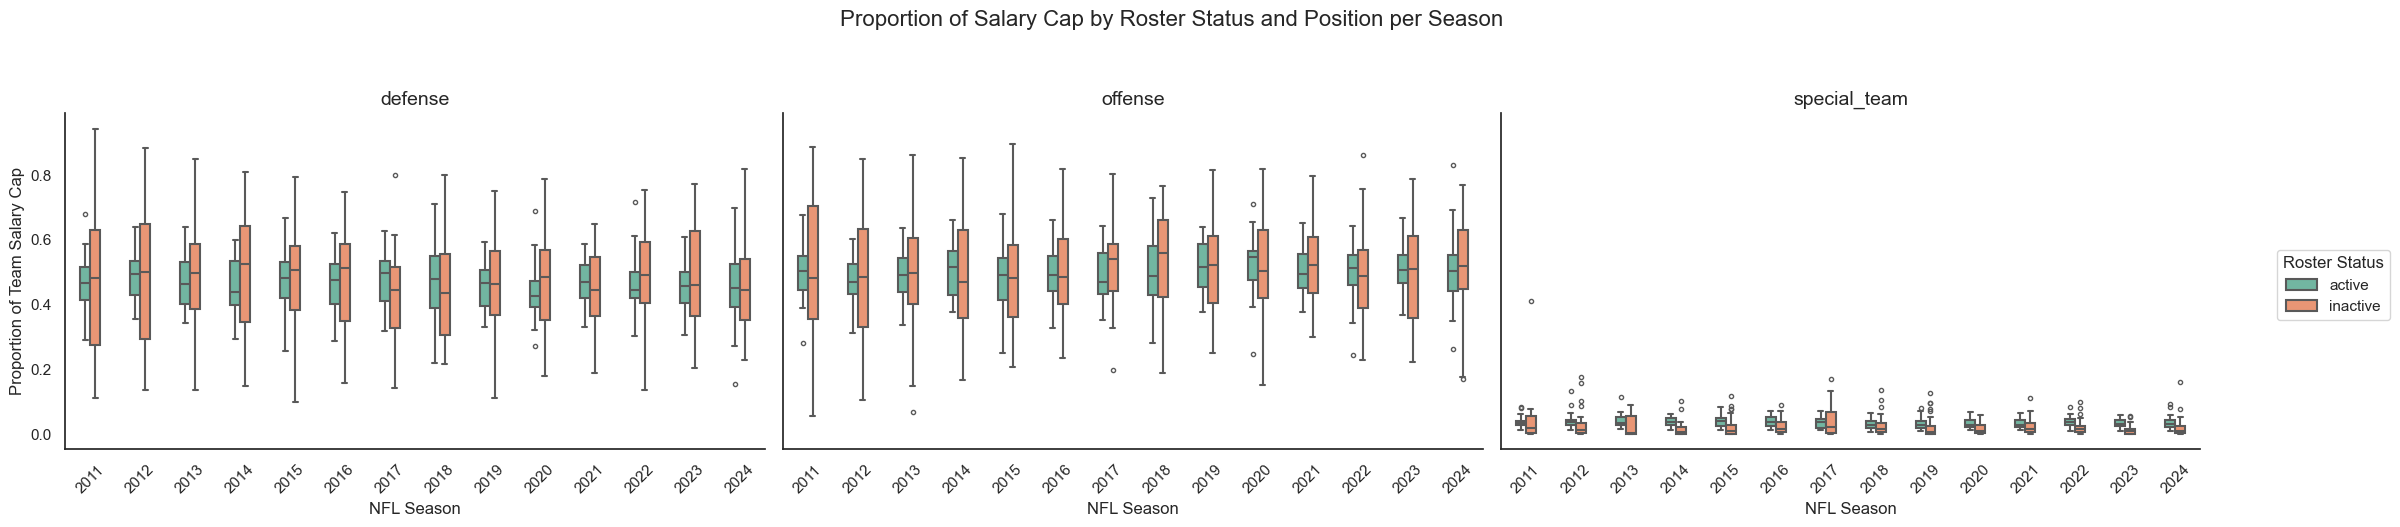

In [65]:
overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot = sns.catplot(
    spotrac_nfl_team_season_roster_position_level_one_df,
    x='season',
    y='position_level_one_cap_hit_prop',
    hue='roster_status',
    col='position_level_one',
    kind='box',
    height=5,  # Height of each facet
    aspect=1.5,  # Aspect ratio (width/height) for each facet
    width=0.4,  # Width of boxes
    palette='Set2',  # Colorblind-friendly palette
    fliersize=3,  # Size of outlier markers
    linewidth=1.5,  # Line width for boxes

)

## Set axis labels and customize facet titles
overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot.set_axis_labels('NFL Season', 'Proportion of Team Salary Cap')
overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot.set_titles("{col_name}", size=14)  # Use position_level_one as facet title

# Rotate x-axis labels for readability
for ax in overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot.axes.flat:
    ax.tick_params(axis='x', rotation=45)

# Move legend outside the plot
sns.move_legend(
    overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot,
    loc='center right',
    bbox_to_anchor=(1.02, 0.5),
    title='Roster Status',
    frameon=True,

)

# Add a suptitle for the entire figure
overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot.figure.suptitle('Proportion of Salary Cap by Roster Status and Position per Season', fontsize=16, y=1.05)

# Adjust layout to prevent overlap
overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot.tight_layout()

# Save the plot with high resolution and proper bounding
overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot.savefig(f'{project_data_exports_path}/overall_season_roster_status_pos_lev_one_cap_hit_prop_boxplot.png', dpi=300, bbox_inches='tight')

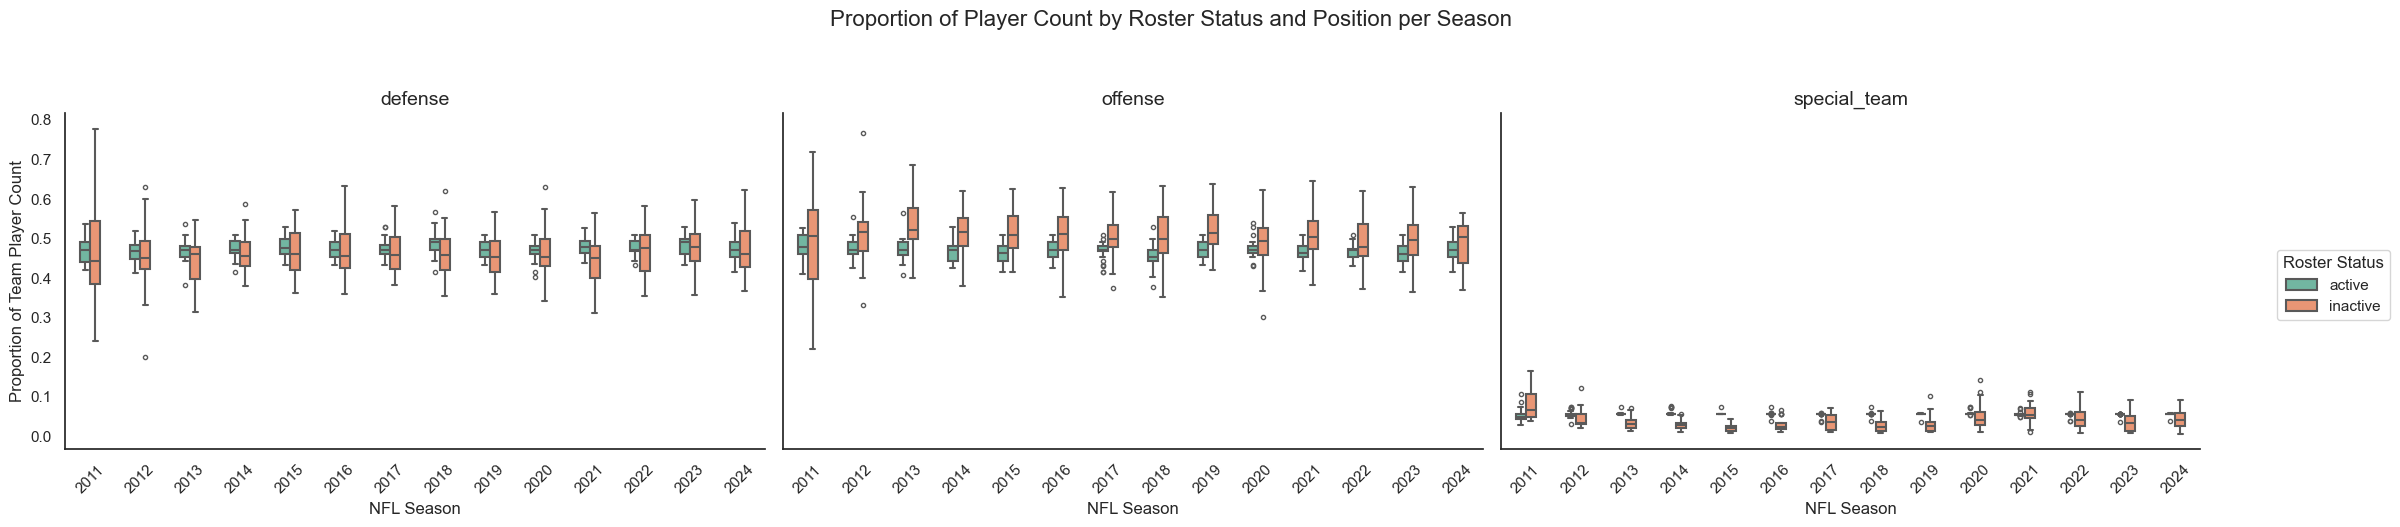

In [67]:
overall_season_roster_status_pos_lev_one_player_count_prop_boxplot = sns.catplot(
    spotrac_nfl_team_season_roster_position_level_one_df,
    x='season',
    y='position_level_one_count_prop',
    hue='roster_status',
    col='position_level_one',
    kind='box',
    height=5,  # Height of each facet
    aspect=1.5,  # Aspect ratio (width/height) for each facet
    width=0.4,  # Width of boxes
    palette='Set2',  # Colorblind-friendly palette
    fliersize=3,  # Size of outlier markers
    linewidth=1.5,  # Line width for boxes

)

## Set axis labels and customize facet titles
overall_season_roster_status_pos_lev_one_player_count_prop_boxplot.set_axis_labels('NFL Season', 'Proportion of Team '
                                                                                                 'Player Count')
overall_season_roster_status_pos_lev_one_player_count_prop_boxplot.set_titles("{col_name}", size=14)  # Use position_level_one as facet title

# Rotate x-axis labels for readability
for ax in overall_season_roster_status_pos_lev_one_player_count_prop_boxplot.axes.flat:
    ax.tick_params(axis='x', rotation=45)

# Move legend outside the plot
sns.move_legend(
    overall_season_roster_status_pos_lev_one_player_count_prop_boxplot,
    loc='center right',
    bbox_to_anchor=(1.02, 0.5),
    title='Roster Status',
    frameon=True,

)

# Add a suptitle for the entire figure
overall_season_roster_status_pos_lev_one_player_count_prop_boxplot.figure.suptitle('Proportion of Player Count by '
                                                                                   'Roster Status and Position per Season', fontsize=16, y=1.05)

# Adjust layout to prevent overlap
overall_season_roster_status_pos_lev_one_player_count_prop_boxplot.tight_layout()

# Save the plot with high resolution and proper bounding
overall_season_roster_status_pos_lev_one_player_count_prop_boxplot.savefig(f'{project_data_exports_path}/overall_season_roster_status_pos_lev_one_player_count_prop_boxplot.png', dpi=300, bbox_inches='tight')